In [145]:
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


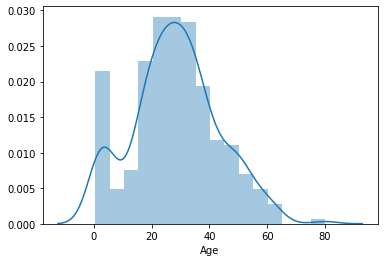

In [148]:
df_train = pd.read_csv(r'C:\Users\User\Desktop\titanic_train.csv')
df_train.info()
df_survived = df_train[(df_train['Survived'] == 1) & (df_train['Age'].notna())]
sns.distplot(df_survived['Age']);

In [75]:
df_train.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df_train = df_train[df_train['Age'].notna()]
dummies = pd.get_dummies(df_train.Sex)
df_train = pd.concat([df_train,dummies], axis='columns')
df_train.drop('Sex',axis='columns',inplace=True)
df_train.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


In [76]:
target = df_train['Survived']
inputs = df_train.drop('Survived',axis='columns')

In [113]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3,random_state = 2)


model1 = GaussianNB();
model1.fit(X_train, y_train);
model1.score(X_test,y_test)




0.813953488372093

In [174]:

model2 = LogisticRegression();

model2.fit(X_train, y_train);
model2.score(X_test,y_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8325581395348837

In [175]:

m1Score = cross_val_score(model1,X_train,y_train,cv=6, scoring='roc_auc')
m1Score

array([0.88338192, 0.87083333, 0.76577381, 0.86011905, 0.84464286,
       0.81212485])

In [176]:
m2Score = cross_val_score(model2,X_train,y_train,cv=6,scoring='roc_auc');
m2Score

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

array([0.90728863, 0.86964286, 0.76815476, 0.87797619, 0.83333333,
       0.84993998])

In [177]:
print("Bayes Model Accuracy: %0.2f (+/- %0.2f)"%(m1Score.mean(),m1Score.std() *2)) 


Bayes Model Accuracy: 0.84 (+/- 0.08)


In [178]:
print("Logistic Model Accuracy: %0.2f (+/- %0.2f)"%(m2Score.mean(), m2Score.std() *2)) 

Logistic Model Accuracy: 0.85 (+/- 0.09)


In [179]:
y_pred_bayes = model1.predict(X_test)
y_pred_logistic = model2.predict(X_test)


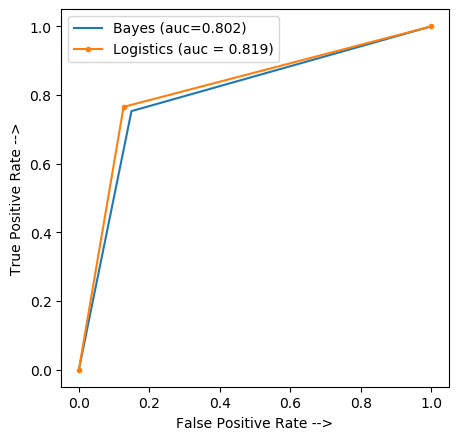

In [180]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

bayes_fpr,bayes_tpr, threshold = roc_curve(y_test,y_pred_bayes)
auc_bayes = auc(bayes_fpr,bayes_tpr)

logistic_fpr,logistic_tpr, threshold = roc_curve(y_test,y_pred_logistic)
auc_logistic = auc(logistic_fpr,logistic_tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(bayes_fpr, bayes_tpr, linestyle ='-',label = 'Bayes (auc=%0.3f)' % auc_bayes)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistics (auc = %0.3f)'% auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()